In [1]:
from bs4 import BeautifulSoup as bs
from splinter import Browser
import time
import datetime
import pandas as pd
import lxml
import re

In [2]:
df = pd.read_csv("./04-19-23.csv")
df

,id,title,subtitle,content,html_content,release_date,solved_by_count,difficulty
0,1,Multiples of 3 or 5,Problem 1,\nIf we list all the natural numbers below 10 ...,<p>If we list all the natural numbers below 10...,2001-10-05T18:00:00,970022,5
1,2,Even Fibonacci numbers,Problem 2,\nEach new term in the Fibonacci sequence is g...,<p>Each new term in the Fibonacci sequence is ...,2001-10-19T18:00:00,774310,5
2,3,Largest prime factor,Problem 3,"\nThe prime factors of 13195 are 5, 7, 13 and ...","<p>The prime factors of 13195 are 5, 7, 13 and...",2001-11-02T18:00:00,557844,5
3,4,Largest palindrome product,Problem 4,\nA palindromic number reads the same both way...,\n<p>A palindromic number reads the same both ...,2001-11-16T18:00:00,493961,5
4,5,Smallest multiple,Problem 5,\n2520 is the smallest number that can be divi...,<p>2520 is the smallest number that can be div...,2001-11-30T18:00:00,497288,5
...,...,...,...,...,...,...,...,...
824,825,Chasing Game,Problem 825,\nTwo cars are on a circular track of total le...,<p>Two cars are on a circular track of total l...,2023-01-15T07:00:00,117,60
825,826,Birds on a Wire,Problem 826,\nConsider a wire of length 1 unit between two...,<p>Consider a wire of length 1 unit between tw...,2023-01-22T10:00:00,184,45
826,827,Pythagorean Triple Occurrence,Problem 827,\n\nDefine Q(n) to be the smallest number that...,<p>\nDefine $Q(n)$ to be the smallest number t...,2023-01-28T13:00:00,144,50
827,828,Numbers Challenge,Problem 828,\nIt is a common recreational problem to make ...,<p>It is a common recreational problem to make...,2023-02-04T16:00:00,392,15


In [3]:
df["content"][56]

'\nIt is possible to show that the square root of two can be expressed as an infinite continued fraction.\n2=1+12+12+12+…\nBy expanding this for the first four iterations, we get:\n1+12=32=1.5\n1+12+12=75=1.4\n1+12+12+12=1712=1.41666…\n1+12+12+12+12=4129=1.41379…\nThe next three expansions are 9970, 239169, and 577408, but the eighth expansion, 1393985, is the first example where the number of digits in the numerator exceeds the number of digits in the denominator.\nIn the first one-thousand expansions, how many fractions contain a numerator with more digits than the denominator?\n'

In [4]:
# use HTML content as well as text content as columns (html content can be rendered correctly with MathJax in a markdown cell)
# problem 57 example

<p>It is possible to show that the square root of two can be expressed as an infinite continued fraction.</p>
<p class="center">$\sqrt 2 =1+ \frac 1 {2+ \frac 1 {2 +\frac 1 {2+ \dots}}}$</p>
<p>By expanding this for the first four iterations, we get:</p>
<p>$1 + \frac 1 2 = \frac  32 = 1.5$<br />
$1 + \frac 1 {2 + \frac 1 2} = \frac 7 5 = 1.4$<br />
$1 + \frac 1 {2 + \frac 1 {2+\frac 1 2}} = \frac {17}{12} = 1.41666 \dots$<br />
$1 + \frac 1 {2 + \frac 1 {2+\frac 1 {2+\frac 1 2}}} = \frac {41}{29} = 1.41379 \dots$<br /></p>
<p>The next three expansions are $\frac {99}{70}$, $\frac {239}{169}$, and $\frac {577}{408}$, but the eighth expansion, $\frac {1393}{985}$, is the first example where the number of digits in the numerator exceeds the number of digits in the denominator.</p>
<p>In the first one-thousand expansions, how many fractions contain a numerator with more digits than the denominator?</p>

In [5]:
# problems per difficulty level
# problem solvers count buckets
# word map from problem titles
# word map from problem statements

# how many problems use MathJax
# how many probems use data
# how many problems use images
# how many links to other pages
# ^^^^ look at percentages, bar chart of counts, etc. for the above "how many" findings


# release date chart?

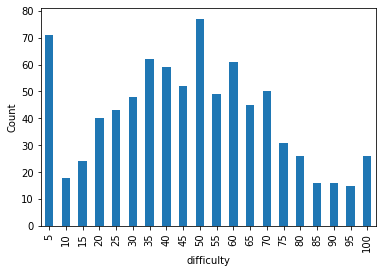

In [79]:
df.groupby(df["difficulty"]).count().plot(kind="bar", y = "id", ylabel="Count", legend=False)

In [89]:
(df.groupby(df["difficulty"])["id"].count()/len(df))*(100)

difficulty
5      8.564536
10     2.171291
15     2.895054
20     4.825090
25     5.186972
30     5.790109
35     7.478890
40     7.117008
45     6.272618
50     9.288299
55     5.910736
60     7.358263
65     5.428227
70     6.031363
75     3.739445
80     3.136309
85     1.930036
90     1.930036
95     1.809409
100    3.136309
Name: id, dtype: float64

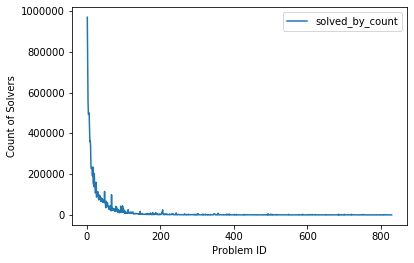

In [109]:
df.plot(x="id", y="solved_by_count", xlabel="Problem ID", ylabel="Count of Solvers")

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [16]:
# define word map generator function
def make_word_map(col, df):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df[col]:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

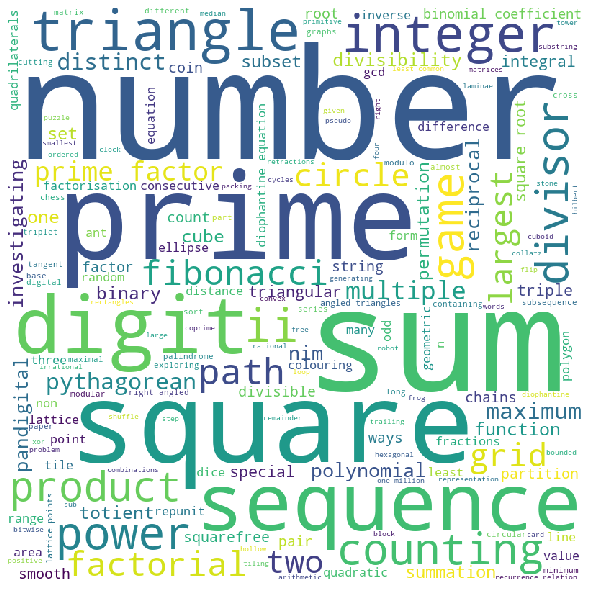

In [17]:
make_word_map("title", df)

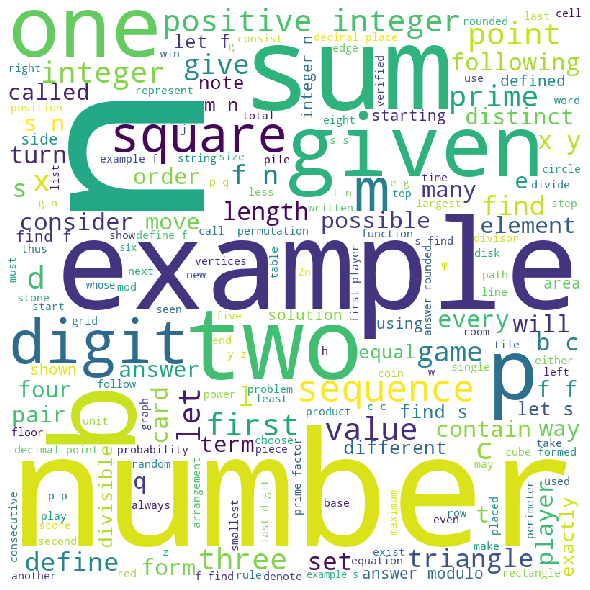

In [18]:
make_word_map("content", df)

In [33]:
data_check = df["html_content"].str.contains(".txt")

print(sum(data_check))

20


In [34]:
data_check2 = df["html_content"].str.contains(".png")

print(sum(data_check2))

78


In [35]:
data_check3 = df["html_content"].str.contains(".jpg")

print(sum(data_check3))

17


In [36]:
data_check4 = df["html_content"].str.contains(".gif")

print(sum(data_check4))

70


In [40]:
together = data_check2 | data_check3 | data_check4
sum(together)

160

In [126]:
data_check5 = df["html_content"].str.contains(r"\.[a-zA-Z]{3}\b")

print(sum(data_check5))

186


In [114]:
extensions = set()

for content in df["html_content"][data_check5]:
    vals = re.findall(r"(\.[a-zA-Z]{3}\b)", content)
    extensions = extensions | set(tuple(vals))
    
extensions

{'.com', '.gif', '.jpg', '.net', '.org', '.png', '.txt'}

In [129]:
from collections import Counter
# counts of each of these external sources
image_counts = Counter()
total = 0
for content in df["html_content"][data_check5]:
    print(content)
    total += 1
    vals = re.findall(r"(\.[a-zA-Z]{3}\b)", content)
    
#     image_counts.update(Counter(vals)) # for total number of each item in the dataset
    image_counts.update(dict([(a, 1) for a in set(tuple(vals))]))# for number of problems containing at least one of the items
    
print(total)
image_counts

<p>Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.</p>
<div class="center">
<img src="https://projecteuler.net/project/images/p015.png" class="dark_img" alt="" /></div>
<p>How many such routes are there through a 20×20 grid?</p>


<p>By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.</p>
<p class="monospace center"><span class="red"><b>3</b></span><br /><span class="red"><b>7</b></span> 4<br />
2 <span class="red"><b>4</b></span> 6<br />
8 5 <span class="red"><b>9</b></span> 3</p>
<p>That is, 3 + 7 + 4 + 9 = 23.</p>
<p>Find the maximum total from top to bottom of the triangle below:</p>
<p class="monospace center">75<br />
95 64<br />
17 47 82<br />
18 35 87 10<br />
20 04 82 47 65<br />
19 01 23 75 03 34<br />
88 02 77 73 07 63 67<br />
99 65 04 28 06 16 70 92<br />
41 41 26 56 83 40 80 70 33<br 

Counter({'.png': 78,
         '.net': 186,
         '.txt': 20,
         '.gif': 70,
         '.org': 2,
         '.jpg': 17,
         '.com': 1})

In [123]:
data_counts = pd.DataFrame(index=image_counts.keys(), data=image_counts.values())
data_counts # note that .net should not be 186, need to change data scraping and formatting for adding local links

,0
.png,78
.net,186
.txt,20
.gif,70
.org,2
.jpg,17
.com,1


In [66]:
df["html_content"][df["html_content"].str.contains(r"\.abc")]

204    <p>Peter has nine four-sided (pyramidal) dice,...
225    <p>The <i>blancmange curve</i> is the set of p...
231    <p>Two players share an unbiased coin and take...
238    <p>A set of disks numbered 1 through 100 are p...
266    <p>You are given a unique investment opportuni...
306    <p>\n<var>k</var> defects are randomly distrib...
435    <p>Julie proposes the following wager to her s...
468    <p>\nIn a room <var>N</var> chairs are placed ...
498    <p>A gambler decides to participate in a speci...
Name: html_content, dtype: object

In [73]:
df["html_content"][df["html_content"].str.contains(r"\.org\b")]

313    <p>\nThe moon has been opened up, and land can...
338    <p>\n<i>"And he came towards a valley, through...
Name: html_content, dtype: object

In [75]:
# mathjax problem count
mathjax_check = df["html_content"].str.contains(r"\$.*\.*\$")

print(sum(mathjax_check))

348


In [76]:
df["html_content"][df["html_content"].str.contains(r"\$.*\.*\$")]

5      <p>The sum of the squares of the first ten nat...
26     <p>Euler discovered the remarkable quadratic f...
52     <p>There are exactly ten ways of selecting thr...
56     <p>It is possible to show that the square root...
63     <p>All square roots are periodic when written ...
                             ...                        
824    <p>Two cars are on a circular track of total l...
825    <p>Consider a wire of length 1 unit between tw...
826    <p>\nDefine $Q(n)$ to be the smallest number t...
827    <p>It is a common recreational problem to make...
828    <p>Given any integer $n&gt;1$ a <i>binary fact...
Name: html_content, Length: 348, dtype: object

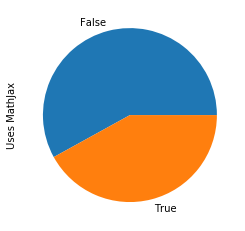

In [103]:
mathjax_check.value_counts().plot(kind="pie", label="Uses MathJax")

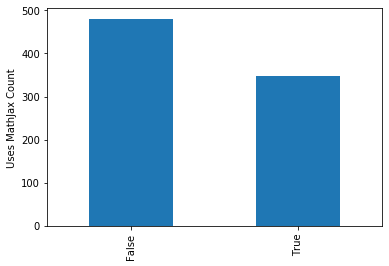

In [110]:
mathjax_check.value_counts().plot(kind="bar", ylabel="Uses MathJax Count")